In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
data = []
labels = []
classes = 43
#cur_path = os.getcwd()
71#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join('traffic sign','Train',str(i))
    imgfol = os.listdir(path)
    for a in imgfol:
        try:
            img = Image.open(path + '\\'+ a)
            img = img.resize((30,30))
            #if i==0:
            #cv2.imshow("1",img)
            img = np.array(img)
            #sim = Image.fromarray(image)
            data.append(img)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)
doup_data,a_data,doup_labels,a_labels = train_test_split(data,labels,test_size=0.3333,random_state=50)
b_data,c_data,b_labels,c_labels = train_test_split(doup_data,doup_labels,test_size=0.5,random_state=51)

a_labels=to_categorical(a_labels,43)
b_labels=to_categorical(b_labels,43)
c_labels=to_categorical(c_labels,43)

print(a_data.shape, a_labels.shape)
print(b_data.shape, b_labels.shape)
print(c_data.shape, c_labels.shape)

(39209, 30, 30, 3) (39209,)
(13069, 30, 30, 3) (13069, 43)
(13070, 30, 30, 3) (13070, 43)
(13070, 30, 30, 3) (13070, 43)


In [3]:
model_1 = Sequential()
model_1.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=a_data.shape[1:],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=2),bias_initializer=tf.keras.initializers.zeros()))
model_1.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model_1.add(MaxPool2D(pool_size=(2, 2)))
model_1.add(Dropout(rate=0.25))
model_1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_1.add(MaxPool2D(pool_size=(2, 2)))
model_1.add(Dropout(rate=0.25))
model_1.add(Flatten())
model_1.add(Dense(256, activation='relu'))
model_1.add(Dropout(rate=0.5))
model_1.add(Dense(43, activation='softmax'))
#Compilation of the model
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [4]:
model_2 = Sequential()
model_2.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=a_data.shape[1:],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=2),bias_initializer=tf.keras.initializers.zeros()))
model_2.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model_2.add(MaxPool2D(pool_size=(2, 2)))
model_2.add(Dropout(rate=0.25))
model_2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPool2D(pool_size=(2, 2)))
model_2.add(Dropout(rate=0.25))
model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(rate=0.5))
model_2.add(Dense(43, activation='softmax'))
#Compilation of the model
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
model_3 = Sequential()
model_3.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=a_data.shape[1:],kernel_initializer=tf.keras.initializers.GlorotNormal(seed=2),bias_initializer=tf.keras.initializers.zeros()))
model_3.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model_3.add(MaxPool2D(pool_size=(2, 2)))
model_3.add(Dropout(rate=0.25))
model_3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_3.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_3.add(MaxPool2D(pool_size=(2, 2)))
model_3.add(Dropout(rate=0.25))
model_3.add(Flatten())
model_3.add(Dense(256, activation='relu'))
model_3.add(Dropout(rate=0.5))
model_3.add(Dense(43, activation='softmax'))
#Compilation of the model
model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=a_data.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
epochs = 15
history_a = model_1.fit(a_data, a_labels, batch_size=64, epochs=epochs)

Epoch 1/15
205/205 [==============================] - 29s 141ms/step - loss: 3.3966 - accuracy: 0.2327
Epoch 2/15
205/205 [==============================] - 26s 128ms/step - loss: 1.5412 - accuracy: 0.5720
Epoch 3/15
205/205 [==============================] - 24s 116ms/step - loss: 0.8836 - accuracy: 0.7438
Epoch 4/15
205/205 [==============================] - 20s 99ms/step - loss: 0.5859 - accuracy: 0.8323
Epoch 5/15
205/205 [==============================] - 20s 99ms/step - loss: 0.4341 - accuracy: 0.8750
Epoch 6/15
205/205 [==============================] - 23s 110ms/step - loss: 0.3346 - accuracy: 0.9040
Epoch 7/15
205/205 [==============================] - 21s 100ms/step - loss: 0.2820 - accuracy: 0.9201
Epoch 8/15
205/205 [==============================] - 23s 114ms/step - loss: 0.2377 - accuracy: 0.9337s - loss: 0
Epoch 9/15
205/205 [==============================] - 22s 107ms/step - loss: 0.2077 - accuracy: 0.9395
Epoch 10/15
205/205 [==============================] - 21s 100ms

In [8]:
epochs = 15
history_b = model_2.fit(b_data, b_labels, batch_size=64, epochs=epochs)

Epoch 1/15
205/205 [==============================] - 18s 89ms/step - loss: 3.4949 - accuracy: 0.2172
Epoch 2/15
205/205 [==============================] - 18s 89ms/step - loss: 1.6740 - accuracy: 0.5414
Epoch 3/15
205/205 [==============================] - 18s 89ms/step - loss: 1.0455 - accuracy: 0.6964
Epoch 4/15
205/205 [==============================] - 18s 89ms/step - loss: 0.7009 - accuracy: 0.7970
Epoch 5/15
205/205 [==============================] - 19s 90ms/step - loss: 0.5087 - accuracy: 0.8493
Epoch 6/15
205/205 [==============================] - 19s 91ms/step - loss: 0.4260 - accuracy: 0.8790
Epoch 7/15
205/205 [==============================] - 18s 89ms/step - loss: 0.3214 - accuracy: 0.90621s - loss:
Epoch 8/15
205/205 [==============================] - 18s 89ms/step - loss: 0.2908 - accuracy: 0.9174
Epoch 9/15
205/205 [==============================] - 18s 90ms/step - loss: 0.2385 - accuracy: 0.9312
Epoch 10/15
205/205 [==============================] - 18s 89ms/step - l

In [8]:
epochs = 15
history_c = model_3.fit(c_data, c_labels, batch_size=64, epochs=epochs)

Epoch 1/15
205/205 [==============================] - 35s 171ms/step - loss: 3.5923 - accuracy: 0.1836
Epoch 2/15
205/205 [==============================] - 33s 161ms/step - loss: 1.8381 - accuracy: 0.5090
Epoch 3/15
205/205 [==============================] - 31s 152ms/step - loss: 1.1306 - accuracy: 0.6836
Epoch 4/15
205/205 [==============================] - 32s 158ms/step - loss: 0.8180 - accuracy: 0.7632
Epoch 5/15
205/205 [==============================] - 32s 154ms/step - loss: 0.5961 - accuracy: 0.8264
Epoch 6/15
205/205 [==============================] - 27s 133ms/step - loss: 0.5033 - accuracy: 0.8525
Epoch 7/15
205/205 [==============================] - 24s 119ms/step - loss: 0.4024 - accuracy: 0.8783
Epoch 8/15
205/205 [==============================] - 23s 113ms/step - loss: 0.3259 - accuracy: 0.9043
Epoch 9/15
205/205 [==============================] - 23s 112ms/step - loss: 0.2942 - accuracy: 0.9132
Epoch 10/15
205/205 [==============================] - 25s 121ms/step - l

In [10]:
#plotting graphs for accuracy 
def plotting(history):
    plt.figure(0)
    plt.plot(history.history['accuracy'], label='training accuracy')
    #plt.plot(history_a.history_a['val_accuracy'], label='val accuracy')
    plt.title('Accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()
    plt.figure(1)
    plt.plot(history.history['loss'], label='training loss')
    #plt.plot(history_a.history_a['val_loss'], label='val loss')
    plt.title('Loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend()
    plt.show()

In [11]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv(os.path.join('traffic sign','Test.csv'),delimiter=',')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open('traffic sign'+'/'+img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

pred = model.predict_classes(X_test)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.013539192399049882


In [12]:
weights_1=np.array(model_1.get_weights())
weights_2=np.array(model_2.get_weights())
weights_3=np.array(model_3.get_weights())
avg_weights=[]

In [13]:
for w1,w2,w3 in zip(weights_1,weights_2,weights_3):
    avg_weights.append((w1+w2+w3)/3)
    

In [14]:
model.set_weights(avg_weights)

In [15]:
weights_1[0][0][0][0][0]

-0.008391473

In [16]:
weights_2[0][0][0][0][0]

-0.03475407

In [17]:
weights_3[0][0][0][0][0]

-0.011981582

In [18]:
avg_weights[0][0][0][0][0]

-0.01837571

In [19]:
from sklearn.metrics import confusion_matrix
def validation_scores(model_val):
    y_test = pd.read_csv(os.path.join('traffic sign','Test.csv'),delimiter=',')

    labels = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open('traffic sign'+'/'+img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)

    pred = model_val.predict_classes(X_test)
    #Accuracy with the test data
    from sklearn.metrics import accuracy_score
    print(confusion_matrix(labels, pred)) 

Epoch 1/5
205/205 [==============================] - 18s 87ms/step - loss: 1.2035 - accuracy: 0.6777
Epoch 2/5
205/205 [==============================] - 16s 80ms/step - loss: 0.4110 - accuracy: 0.8889
Epoch 3/5
205/205 [==============================] - 17s 84ms/step - loss: 0.2607 - accuracy: 0.9261
Epoch 4/5
205/205 [==============================] - 20s 99ms/step - loss: 0.2107 - accuracy: 0.9406
Epoch 5/5
205/205 [==============================] - 27s 130ms/step - loss: 0.1626 - accuracy: 0.9549
Epoch 1/5
205/205 [==============================] - 21s 101ms/step - loss: 0.9632 - accuracy: 0.7415
Epoch 2/5
205/205 [==============================] - 20s 96ms/step - loss: 0.3166 - accuracy: 0.9157
Epoch 3/5
205/205 [==============================] - 20s 97ms/step - loss: 0.2268 - accuracy: 0.9369
Epoch 4/5
205/205 [==============================] - 20s 96ms/step - loss: 0.1773 - accuracy: 0.9503
Epoch 5/5
205/205 [==============================] - 20s 97ms/step - loss: 0.1551 - accur

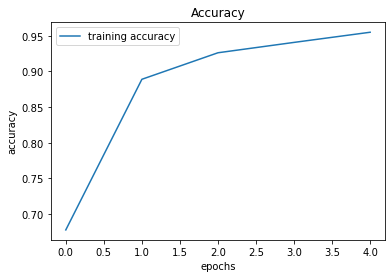

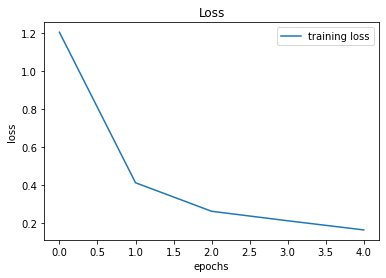

for i=0b


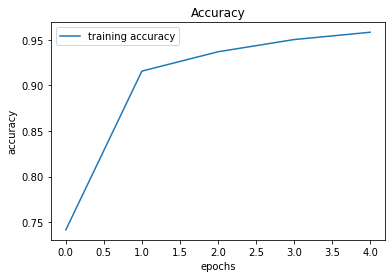

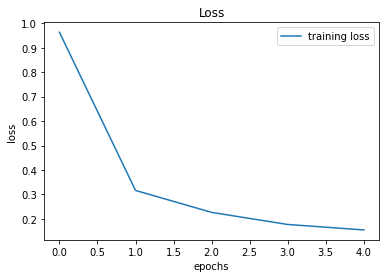

for i=0c


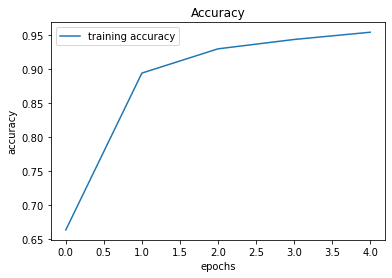

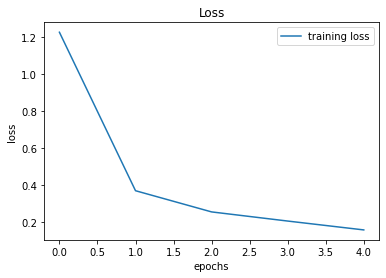

[[ 59   0   0 ...   0   0   0]
 [  2 705   6 ...   0   0   0]
 [  0   8 738 ...   0   0   0]
 ...
 [  0   5   0 ...  72   0   0]
 [  0   0   0 ...   0  39   0]
 [  0   1   0 ...   1   0  62]]
[[ 58   0   0 ...   0   0   0]
 [  0 709   2 ...   0   0   0]
 [  0   7 736 ...   0   0   0]
 ...
 [  0   0   0 ...  88   0   0]
 [  0   0   0 ...   0  39   0]
 [  0   0   0 ...   1   0  89]]
[[ 60   0   0 ...   0   0   0]
 [  0 715   2 ...   0   0   0]
 [  0   3 739 ...   0   0   0]
 ...
 [  0   3   0 ...  82   0   0]
 [  0   0   0 ...   0  47   0]
 [  0   0   0 ...   0   0  86]]
Epoch 1/5
205/205 [==============================] - 23s 110ms/step - loss: 0.1670 - accuracy: 0.9535
Epoch 2/5
205/205 [==============================] - 24s 115ms/step - loss: 0.1537 - accuracy: 0.9572
Epoch 3/5
205/205 [==============================] - 27s 129ms/step - loss: 0.1118 - accuracy: 0.9692
Epoch 4/5
205/205 [==============================] - 26s 126ms/step - loss: 0.1064 - accuracy: 0.9699
Epoch 5/5
205/20

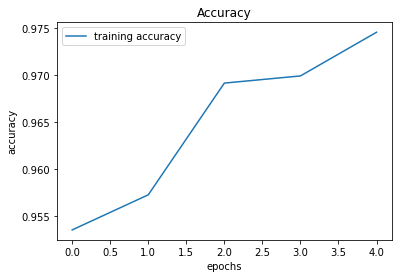

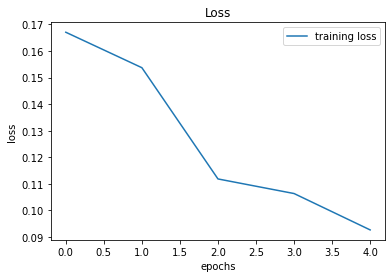

for i=1b


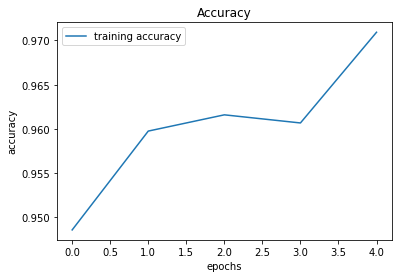

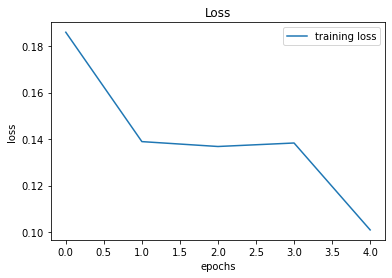

for i=1c


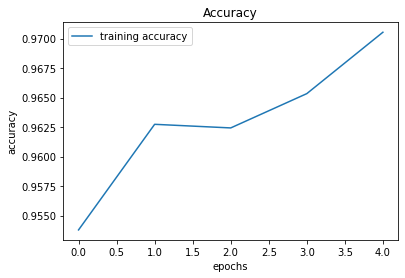

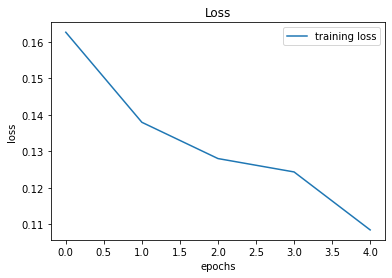

[[ 60   0   0 ...   0   0   0]
 [  0 715   3 ...   2   0   0]
 [  0   4 745 ...   0   0   0]
 ...
 [  0   0   0 ...  88   0   0]
 [  0   0   0 ...   0  52   0]
 [  0   0   0 ...   0   0  83]]
[[ 60   0   0 ...   0   0   0]
 [  0 715   5 ...   0   0   0]
 [  0   5 741 ...   0   0   0]
 ...
 [  0   3   0 ...  69   0   0]
 [  0   0   0 ...   0  46   0]
 [  0   0   0 ...   0   0  88]]
[[ 60   0   0 ...   0   0   0]
 [  0 717   1 ...   2   0   0]
 [  0   5 743 ...   0   0   0]
 ...
 [  0   9   0 ...  77   0   0]
 [  0   0   0 ...   0  50   0]
 [  0   0   0 ...   0   0  87]]
Epoch 1/5
205/205 [==============================] - 23s 113ms/step - loss: 0.0812 - accuracy: 0.9790
Epoch 2/5
205/205 [==============================] - 24s 118ms/step - loss: 0.0691 - accuracy: 0.9796
Epoch 3/5
205/205 [==============================] - 24s 117ms/step - loss: 0.0802 - accuracy: 0.9775
Epoch 4/5
205/205 [==============================] - 24s 116ms/step - loss: 0.1292 - accuracy: 0.9674
Epoch 5/5
205/20

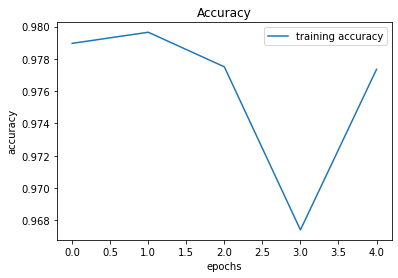

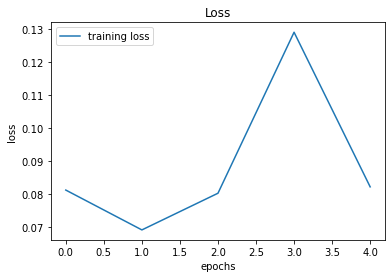

for i=2b


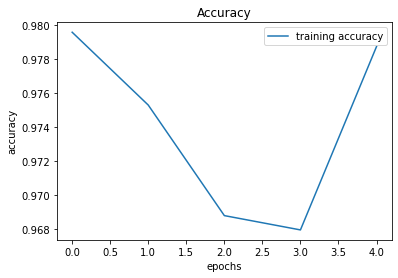

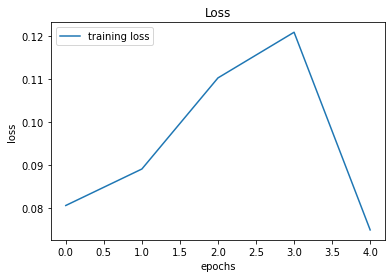

for i=2c


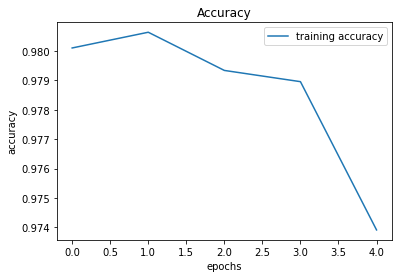

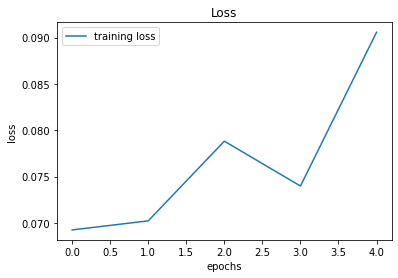

[[ 60   0   0 ...   0   0   0]
 [  0 715   0 ...   4   0   0]
 [  0   7 739 ...   1   0   0]
 ...
 [  0   0   0 ...  89   0   0]
 [  0   0   0 ...   0  56   0]
 [  0   0   0 ...   0   0  90]]
[[ 60   0   0 ...   0   0   0]
 [  0 718   0 ...   0   0   0]
 [  0   9 736 ...   0   0   0]
 ...
 [  0   0   0 ...  88   0   0]
 [  0   0   0 ...   0  46   0]
 [  0   0   0 ...   0   0  89]]
[[ 60   0   0 ...   0   0   0]
 [  0 710   0 ...   1   0   0]
 [  0   1 746 ...   0   0   0]
 ...
 [  0   2   0 ...  85   0   1]
 [  0   0   0 ...   0  41   0]
 [  0   0   0 ...   0   0  90]]


In [20]:
for i in range(3):
    model_1.set_weights(avg_weights)
    model_2.set_weights(avg_weights)
    model_3.set_weights(avg_weights)
    epochs = 5
    history_a = model_1.fit(a_data, a_labels, batch_size=64, epochs=epochs)
    history_b = model_2.fit(b_data, b_labels, batch_size=64, epochs=epochs)
    history_c = model_3.fit(c_data, c_labels, batch_size=64, epochs=epochs)
    if i==0:
        print('for i=0a')
        plotting(history_a)
        print('for i=0b')
        plotting(history_b)
        print('for i=0c')
        plotting(history_c)
    if i==1:
        print('for i=1a')
        plotting(history_a)
        print('for i=1b')
        plotting(history_b)
        print('for i=1c')
        plotting(history_c)
    if i==2:
        print('for i=2a')
        plotting(history_a)
        print('for i=2b')
        plotting(history_b)
        print('for i=2c')
        plotting(history_c)
        
    validation_scores(model_1)
    validation_scores(model_2)
    validation_scores(model_3)
    weights_1=np.array(model_1.get_weights())
    weights_2=np.array(model_2.get_weights())
    weights_3=np.array(model_3.get_weights())
    avg_weights=[]
    for w1,w2,w3 in zip(weights_1,weights_2,weights_3):
        avg_weights.append((w1+w2+w3)/3)
    

In [21]:
model.set_weights(avg_weights)
validation_scores(model)

[[ 60   0   0 ...   0   0   0]
 [  0 718   0 ...   2   0   0]
 [  0   4 744 ...   0   0   0]
 ...
 [  0   0   0 ...  88   0   0]
 [  0   0   0 ...   0  49   0]
 [  0   0   0 ...   0   0  90]]


In [23]:
from sklearn.metrics import accuracy_score
def validation_scores(model_val):
    y_test = pd.read_csv(os.path.join('traffic sign','Test.csv'),delimiter=',')

    labels = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open('traffic sign'+'/'+img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)

    pred = model_val.predict_classes(X_test)
    #Accuracy with the test data
    from sklearn.metrics import accuracy_score
    print(accuracy_score(labels, pred))

In [24]:
validation_scores(model)

0.9766429136975455
